# TD 4 - La régression linéaire - algo. de descente du gradient

## Packages utiles

In [1]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

## Les données

In [2]:
#66 Import des données
boston = datasets.load_boston()
print(boston.DESCR)
#0- CRIM     per capita crime rate by town
#1- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#2- INDUS    proportion of non-retail business acres per town
#3- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#4- NOX      nitric oxides concentration (parts per 10 million)
#5- RM       average number of rooms per dwelling
#6- AGE      proportion of owner-occupied units built prior to 1940
#7- DIS      weighted distances to five Boston employment centres
#8- RAD      index of accessibility to radial highways
#9- TAX      full-value property-tax rate per $10,000
#10- PTRATIO  pupil-teacher ratio by town
#11- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#12- LSTAT    % lower status of the population
#13- MEDV     Median value of owner-occupied homes in $1000's


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#-- Récupérer les variables explicatives (X) et leur nom, la variable à expliquer (Y)
X = boston.data
names = boston.feature_names
Y = boston.target
X.shape

(506, 13)

### Analyser et sélectionner les données étudiées

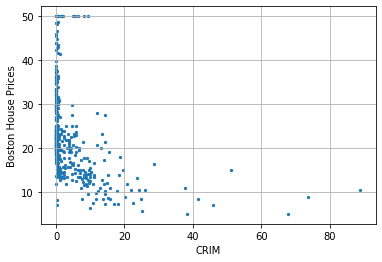

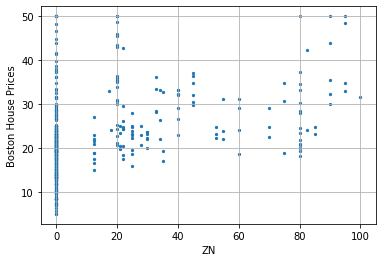

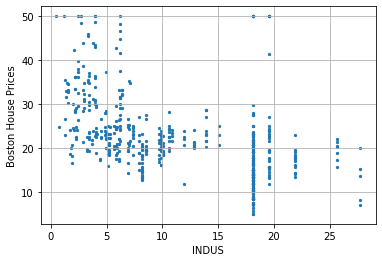

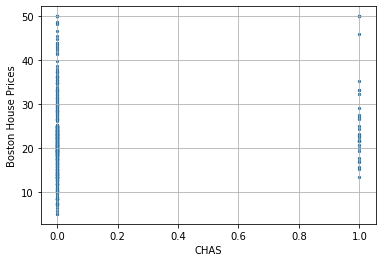

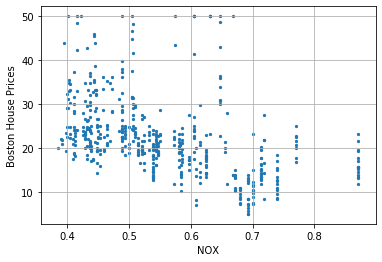

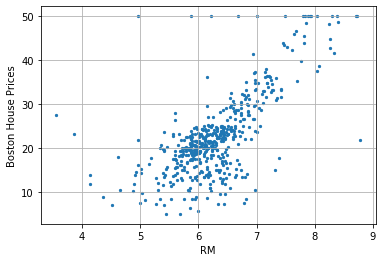

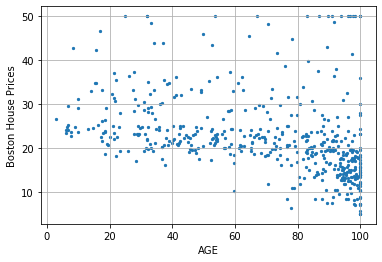

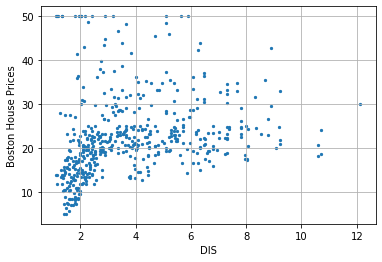

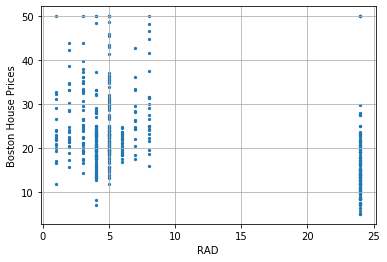

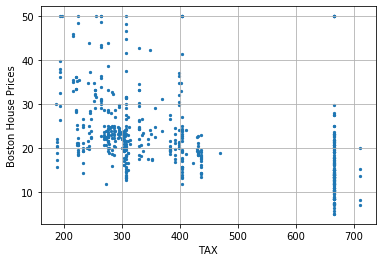

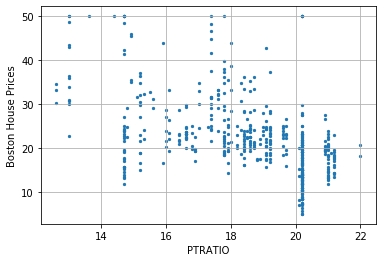

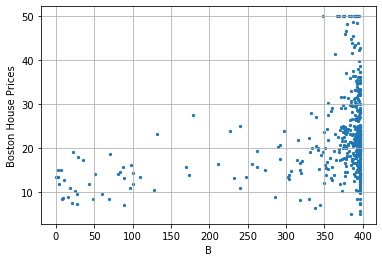

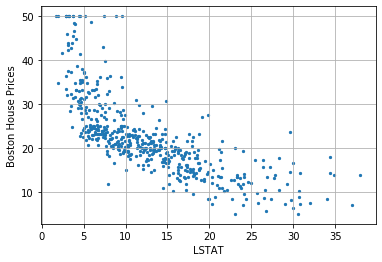

In [4]:
#-- Afficher les statistiques descriptives
m,d = X.shape
for k in range(d):
    plt.figure()
    plt.scatter(X[:,k],Y,s=5)
    plt.xlabel(names[k])
    plt.ylabel("Boston House Prices")
    plt.grid()
    plt.show()

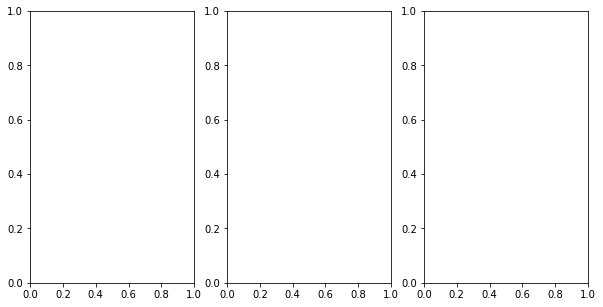

In [6]:
#-- Sélectionner les variables pour la régression simple puis multiple et afficher les (scatterplot)
plt.figure(figsize=(10,5))

plt.subplot(131)

plt.subplot(132)

plt.subplot(133)

plt.show()



In [5]:
#-- Préparer les données étudiées
# ---- reg lineaire simple 
m,d = X.shape
#attention difference
#test = np.ones((2,))
#test1 = np.ones((2,1))
#print(test)
#print(test1)
print(m)
print(d)

print(X[:,3:5].shape)
# np.stack / np.vstack / np.hstack
X1 = np.stack((np.ones((m,)),X[:,5]), axis=-1)

X3 = np.stack((np.ones((m,)),X[:,3],X[:,4],X[:,5]), axis=-1)


506
13
(506, 2)


## Algorithme de descente du gradient

Code des fonctions et tests de ces fonctions dans le cas de la régression simple et multiple

ATTENTION : les paramètres des fonctions sont à compléter


In [6]:
#-- Modèle
def f(X,betas):
    return np.dot(X,betas)


#-- Test 1 - reg simple
Yhat1 = f(X1,[0,1])
#print(Yhat1.shape)
print(Yhat1[:5])


#-- Test 2 - reg multiple
Yhat3 = f(X3,[0,1,-1,2])
#print(Yhat3.shape)
print(Yhat3[:5])


[6.575 6.421 7.185 6.998 7.147]
[12.612 12.373 13.901 13.538 13.836]


In [7]:
#%% Fonction-cout
def cout(X,Y,betas):
    m,d = X.shape
    return (1/(2*m))*sum((f(X,betas)-Y)**2)
        

#%% Test 1 - reg simple
Ycout1 = cout(X1,Y,[0,1])
print(Ycout1)
#%% Test 2 - reg multiple
Ycout3 = cout(X3,Y,[0,1,-1,2])
print(Ycout3)

169.97310577766788
88.07220882657116


In [8]:
#%% Gradient
def grad(X,Y,betas):
    m,d = X.shape
    return 1/m * np.dot(f(X,betas)-Y,X)

#%% Test 1 - reg simple
print(grad(X1,Y,[0,1]))
#%% Test 2 - reg multiple
print(grad(X3,Y,[0,1,-1,2]))

[ -16.24817194 -106.10569042]
[-10.44906265  -1.03715     -5.40136277 -69.12690617]


In [9]:

#--- standardisation des X (données centrées-réduites)
# attention : ne pas standardiser X^0...
def standardisation(X):
    Xtmp = np.divide(np.subtract(X,np.mean(X,axis=0)),np.std(X))
    Xtmp[:,0] = 1
    return Xtmp
    
#-- Test 1 - reg simple
print(X1)
print(standardisation(X1))

#-- Test 2 - reg multiple
print(X3)
print(standardisation(X3))

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]
[[ 1.          0.10800167]
 [ 1.          0.05072127]
 [ 1.          0.33489155]
 ...
 [ 1.          0.25715387]
 [ 1.          0.18945886]
 [ 1.         -0.09471142]]
[[1.    0.    0.538 6.575]
 [1.    0.    0.469 6.421]
 [1.    0.    0.469 7.185]
 ...
 [1.    0.    0.573 6.976]
 [1.    0.    0.573 6.794]
 [1.    0.    0.573 6.03 ]]
[[ 1.         -0.02726552 -0.00658088  0.11445676]
 [ 1.         -0.02726552 -0.03377941  0.05375281]
 [ 1.         -0.02726552 -0.03377941  0.35490749]
 ...
 [ 1.         -0.02726552  0.00721547  0.27252356]
 [ 1.         -0.02726552  0.00721547  0.20078252]
 [ 1.         -0.02726552  0.00721547 -0.10037217]]


In [13]:
#%% Algo de descente du gradient
def grad_descent(X,Y,betas,pas):
    X = standardisation(X)
    new_beta =  - pas * grad(X,Y,betas)
    err = 1
    i=0
    while i<10000 and err > 0.01 or err < -0.01:
        
        new_beta = new_beta - pas * grad(X,Y,new_beta)
        err = abs(cout(X,Y,betas) - cout(X,Y,new_beta))
        
        print(err)
        betas = new_beta
        i+=1
    print("nombre d'itération")
    print(i)
    return new_beta
    
        
#-- Test 1  - reg simple
grad_descent(X1,Y,[0,1],0.001)
#-- Test 2 - reg multiple
grad_descent(X3,Y,[0,1,-1,2],0.001)


0.6145724163429804
0.5082281553717394
0.5072173883476125
0.5062086411400628
0.5052019097111042
0.5041971900338353
0.5031944780838558
0.5021937698498959
0.5011950613253475
0.5001983485139476
0.4992036274253451
0.4982108940789658
0.497220144501739
0.49623137472616463
0.4952445807967365
0.4942597587637465
0.4932769046850467
0.49229601462621986
0.49131708466097734
0.4903401108738876
0.48936508935133816
0.4883920161922788
0.48742088750259427
0.4864516993946495
0.4854844479893927
0.48451912941527553
0.48355573980944655
0.48259427531525034
0.4816347320840464
0.4806771062766302
0.4797213940597089
0.4787675916071521
0.4778156951029473
0.4768657007359707
0.4759176047049323
0.47497140321445386
0.47402709247643315
0.47308466871464816
0.47214412815350215
0.471205467030984
0.47026868158843627
0.46933376807811555
0.4684007227567122
0.467469541891262
0.4665402217535757
0.46561275862427465
0.4646871487919384
0.463763388552195
0.4628414742057885
0.46192140206511567
0.46100316844746203
0.4600867696761384

array([19.76259362,  0.32484138, -0.3606514 ,  3.41945742])

## Test avec plusieurs initialisations : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

In [14]:
#-- Test 1  - reg simple
print("test simple avec alpha = 0.001")
grad_descent(X1,Y,[0,1],0.001)

print("\n Test simple avec alpha = 0.01")
grad_descent(X1,Y,[0,1],0.01)

#-- Test 2 - reg multiple
print("\n Test  reg multiple avec alpha = 0.001")
grad_descent(X3,Y,[0,1,-1,2],0.001)
print("\n Test  reg multiple avec alpha = 0.01")
grad_descent(X3,Y,[0,1,-1,2],0.01)

test simple avec alpha = 0.001
0.6145724163429804
0.5082281553717394
0.5072173883476125
0.5062086411400628
0.5052019097111042
0.5041971900338353
0.5031944780838558
0.5021937698498959
0.5011950613253475
0.5001983485139476
0.4992036274253451
0.4982108940789658
0.497220144501739
0.49623137472616463
0.4952445807967365
0.4942597587637465
0.4932769046850467
0.49229601462621986
0.49131708466097734
0.4903401108738876
0.48936508935133816
0.4883920161922788
0.48742088750259427
0.4864516993946495
0.4854844479893927
0.48451912941527553
0.48355573980944655
0.48259427531525034
0.4816347320840464
0.4806771062766302
0.4797213940597089
0.4787675916071521
0.4778156951029473
0.4768657007359707
0.4759176047049323
0.47497140321445386
0.47402709247643315
0.47308466871464816
0.47214412815350215
0.471205467030984
0.47026868158843627
0.46933376807811555
0.4684007227567122
0.467469541891262
0.4665402217535757
0.46561275862427465
0.4646871487919384
0.463763388552195
0.4628414742057885
0.46192140206511567
0.46100

array([22.52206152,  1.07767073, -1.19336359, 10.17388492])

**Commentaires:**
La regression multiple est plus beaucoup plus rapide lorsque l'alpha est a 0.01 à la place de 0.001. En ce qui concerne la regression simple la modification du pas ne change pas enormement  le nombre d'itération qui sont exécutés.


## Test avec plusieurs pas de descente : visualisation de la fonction cout et des valeurs des paramètres au cours des itérations

In [23]:
def grad_descent_pas_variant(X,Y,betas):
    pas = 5
    X = standardisation(X)
    new_beta =  - pas * grad(X,Y,betas)
    err = 1
    i=0
    while i<10000 and err > 0.01 or err < -0.01:
        
        new_beta = new_beta - pas * grad(X,Y,new_beta)
        err = abs(cout(X,Y,betas) - cout(X,Y,new_beta))
        
        print("erreur=",err," pas=",pas)
        betas = new_beta
        pas = 1/2 * pas
        i+=1
    print("nombre d'itération",i)
    return new_beta

#-- Test 1  - reg simple
print("\ntest simple avec alpha variant a chaque iteration")
grad_descent_pas_variant(X1,Y,[0,1])

#-- Test 2 - reg multiple
print("\ntest multiple avec alpha variant a chaque iteration")
grad_descent_pas_variant(X3,Y,[0,1,-1,2])



test simple avec alpha variant a chaque iteration
erreur= 64720.48106681125  pas= 5
erreur= 81235.12498348343  pas= 2.5
erreur= 137086.83858873052  pas= 1.25
erreur= 7854.100590989575  pas= 0.625
erreur= 677.8236205336661  pas= 0.3125
erreur= 175.04104388384968  pas= 0.15625
erreur= 64.95237322322737  pas= 0.078125
erreur= 28.162282219521614  pas= 0.0390625
erreur= 13.132373724793979  pas= 0.01953125
erreur= 6.343407549836627  pas= 0.009765625
erreur= 3.117709694590417  pas= 0.0048828125
erreur= 1.545562950115027  pas= 0.00244140625
erreur= 0.7694839652806991  pas= 0.001220703125
erreur= 0.38392076585057566  pas= 0.0006103515625
erreur= 0.19175547241832192  pas= 0.00030517578125
erreur= 0.09582655770680049  pas= 0.000152587890625
erreur= 0.0479004903634177  pas= 7.62939453125e-05
erreur= 0.02394704882544829  pas= 3.814697265625e-05
erreur= 0.011972725419809649  pas= 1.9073486328125e-05
erreur= 0.005986162973215414  pas= 9.5367431640625e-06
nombre d'itération 20

test multiple avec alp

array([-2.51555312,  1.94279541, -2.18092363, 16.8632933 ])

**Commentaires: <br>Lorsque le pas diminue de moitié a chaque itération on trouve la solution en 20 itération à la place de 700 dans le meilleur cas pour un pas fixe.**

## Commentaires
**pour le choix du critère d'arrêt:**<br>
On cherche à obtenir le résultat le plus proche de possible, plus l'erreur accepté est proche de 0 plus il va y avoir d'itération.





**pour la standardisation des données:**<br>
La standardisation des données permet à l'algorrithme de réduire le nombre d'itération nécessaire (environ itération pour la dernière version avec pas variant)




## Comparaison avec les résultats du maximum de vraisemblance

In [ ]:
#-- Pour comparer avec le maximum de vraisemblance
#(X^T X)^-1 X^T Y

def coef_ml():
    

#-- Test 1  - reg simple

#-- Test 2 - reg multiple

#-- (ou bien utiliser la fonction native de sklearn)

**Commentaires:**